In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and save as a grouped csv, this step was only run once to group data, 
# some manual modifications were made on the grouped spreadsheet

'''
dfList = []

topics_dictionary = ['Urban, community and disaster', 'Health and psychological',
                     'Supply-chain', 'Environmental science and food', 'Energy and power-grid',
                     'Ecological, soil and animal']

file = open('data/meta-review_reading.xlsx', 'rb')
for topic_number in range (1, 7):
    for sorting in ['citation', 'newer']:
        dfTopic = pd.read_excel(file, sheet_name=f'{topic_number}-{sorting}', engine='openpyxl')
        dfTopic['topic'] = topics_dictionary[topic_number-1]
        dfTopic['sorting'] = sorting
        dfList.append(dfTopic)

df = pd.concat(dfList, ignore_index=True)

# Cleaning data

## Replace False and True by numbers
df = df.replace(False, 0)
df = df.replace(True, 1)

df = df.replace('Compound indexes with mostly individual level components', 
                        'Compound indicator at individual level')
df = df.replace('Compound indexes with mostly system level components', 
                        'Compound indicator at system level')

df.to_excel('data/meta_review_grouped.xlsx')
'''

"\ndfList = []\n\ntopics_dictionary = ['Urban, community and disaster', 'Health and psychological',\n                     'Supply-chain', 'Environmental science and food', 'Energy and power-grid',\n                     'Ecological, soil and animal']\n\nfile = open('data/meta-review_reading.xlsx', 'rb')\nfor topic_number in range (1, 7):\n    for sorting in ['citation', 'newer']:\n        dfTopic = pd.read_excel(file, sheet_name=f'{topic_number}-{sorting}', engine='openpyxl')\n        dfTopic['topic'] = topics_dictionary[topic_number-1]\n        dfTopic['sorting'] = sorting\n        dfList.append(dfTopic)\n\ndf = pd.concat(dfList, ignore_index=True)\n\n# Cleaning data\n\n## Replace False and True by numbers\ndf = df.replace(False, 0)\ndf = df.replace(True, 1)\n\ndf = df.replace('Compound indexes with mostly individual level components', \n                        'Compound indicator at individual level')\ndf = df.replace('Compound indexes with mostly system level components', \n         

In [3]:
# Read grouped excell - optional step
df = pd.read_excel('data/meta_review_grouped.xlsx', index_col=0, engine='openpyxl')

In [4]:
# Drop columns that will not be used
drop_columns = ['Validator name', 'Metric name (optional)', 
                'Title of original reference paper (optional)', 'Other']
df = df.drop(columns=drop_columns)

# Rename columns
new_columns_name = ['paper_title', 'paper_DOI', 'reader', 'discipline', 'category', 'diversity-based', 
                    'agency-based', 'description', 'topic', 'sorting']
new_columns = dict(zip(list(df.columns), new_columns_name))
df = df.rename(columns=new_columns)

# Create data frame removing none of above and not identifiable categories
dfNotNull = df[~df['category'].isin(['None of above', 'Not identifiable'])]

In [5]:
# Print percentages

dfGroup = dfNotNull.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

print(df.groupby('paper_DOI').size().describe())

dfGroup

count    36.000000
mean      8.722222
std       6.527354
min       3.000000
25%       4.000000
50%       7.000000
75%      11.250000
max      32.000000
dtype: float64


category,Compound indicator at individual level,Compound indicator at system level,Early-warning signals,Performance under disruption,Shape of potential landscape,System Structure
topic,,,,,,
"Ecological, soil and animal",0.080000,0.020000,0.280000,0.500000,0.120000,NaN
Energy and power-grid,NaN,0.078431,0.098039,0.784314,0.039216,NaN
Environmental science and food,0.133333,NaN,0.566667,0.100000,NaN,0.200000
Health and psychological,0.960000,0.040000,NaN,NaN,NaN,NaN
Supply-chain,0.305556,0.041667,0.041667,0.222222,0.069444,0.319444
"Urban, community and disaster",0.046512,0.488372,NaN,0.465116,NaN,NaN
All topic models,0.270270,0.104730,0.131757,0.351351,0.043919,0.097973


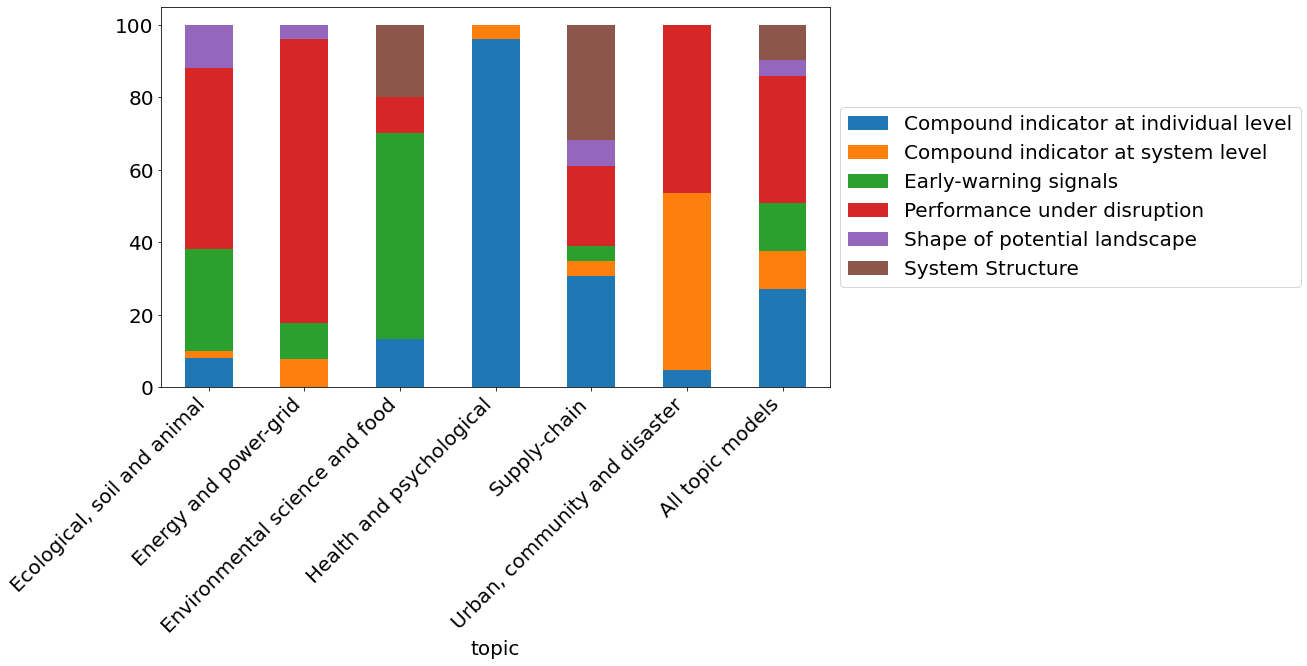

In [6]:
# Metric category per topic model

dfGroup = dfNotNull.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Percentage of metric category per topic model')
plt.show()

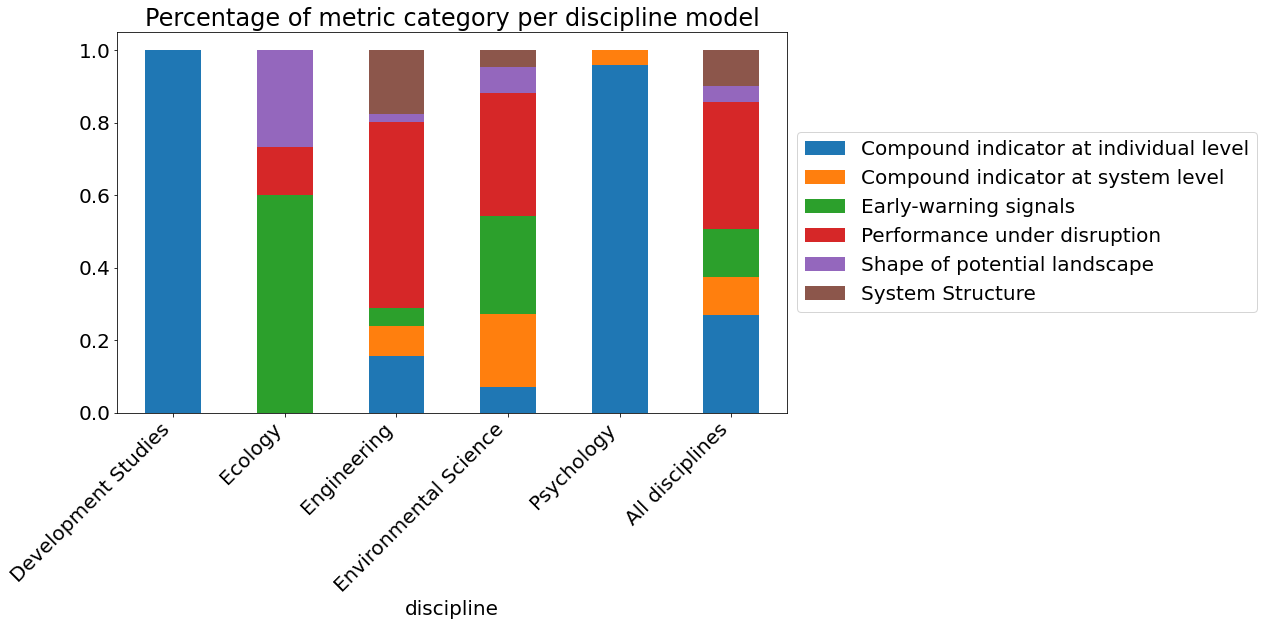

In [7]:
# Metric category per discipline (full discipline list)

dfGroup = dfNotNull.groupby(['discipline', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All disciplines'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of metric category per discipline model')
plt.show()

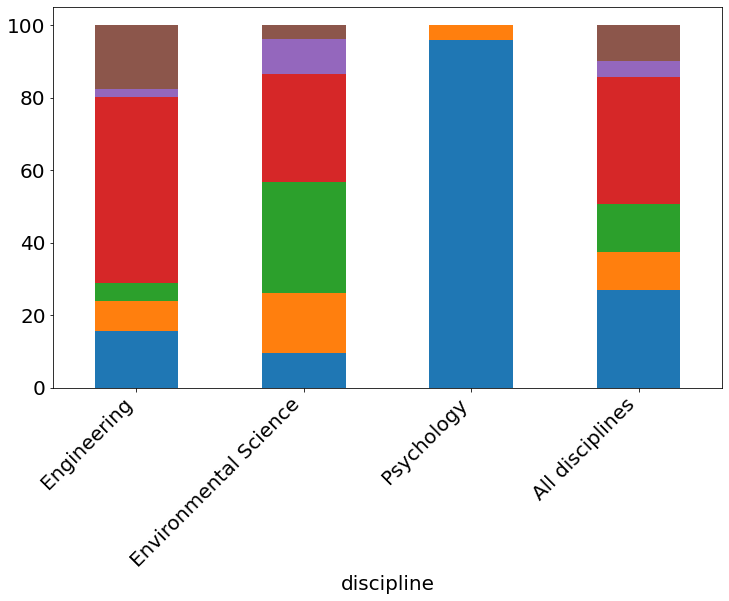

In [8]:
# Metric category per discipline (reduced discipline set)

dfSimplerDiscipline = dfNotNull.replace(['Ecology', 'Development Studies'], 'Environmental Science')

dfGroup = dfSimplerDiscipline.groupby(['discipline', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All disciplines'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), legend=None)
plt.xticks(rotation=45, ha='right')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Percentage of metric category per topic model')
plt.show()

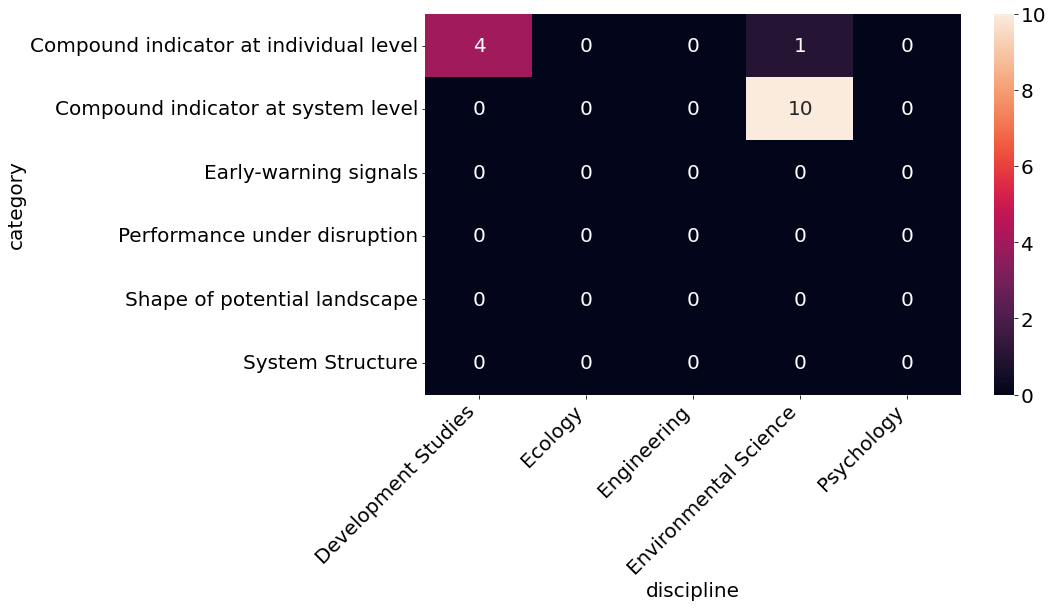

In [9]:
# Diversity-based metric per category and discipline

dfGroup = dfNotNull[['discipline', 'category', 'diversity-based']].groupby(['discipline', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)

dfGroup = dfGroup.pivot("category", "discipline", "diversity-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
#plt.title('Number of diversity-based metric per category and discipline\n')
plt.show()

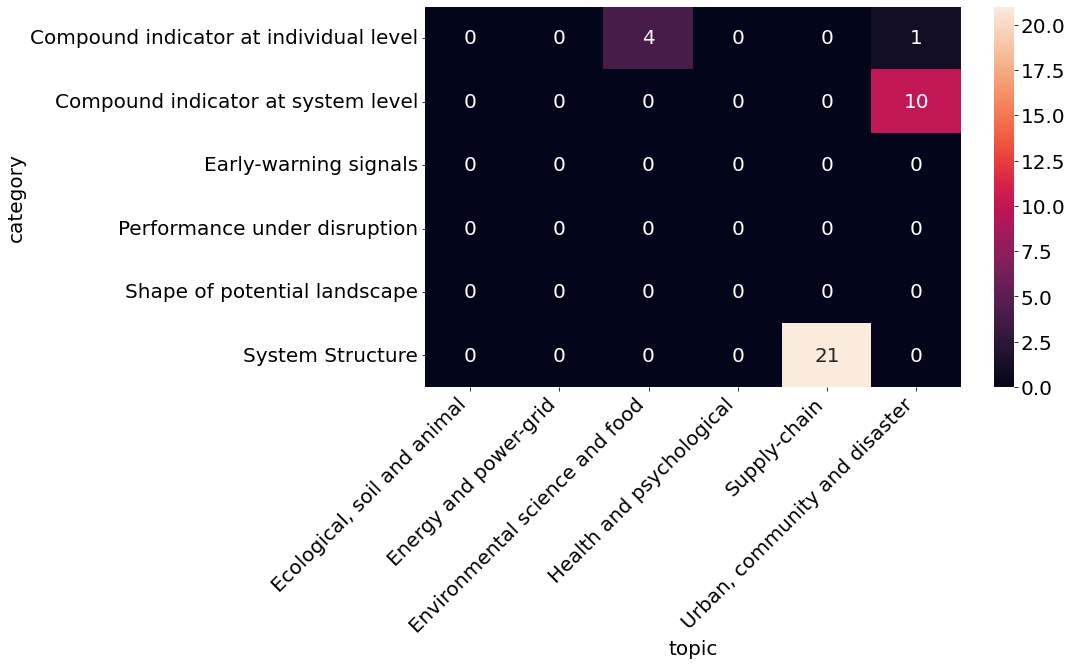

In [10]:
# Diversity-based metric per category and topic model

dfGroup = dfNotNull[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "topic", "diversity-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)

plt.xticks(rotation=45, ha='right')
#plt.title('Number of diversity-based metric per category and topic modelling\n')
plt.show()

<Figure size 1080x504 with 0 Axes>

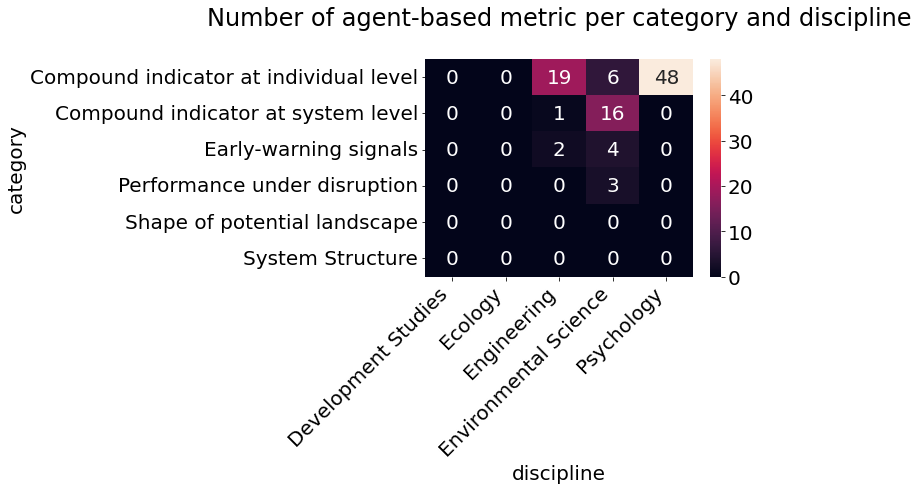

In [11]:
# Agency-based metric per category and discipline

dfGroup = dfNotNull[['discipline', 'category', 'agency-based']].groupby(['discipline', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "discipline", "agency-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(15, 7))
plt.figure()
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of agent-based metric per category and discipline\n')
plt.show()

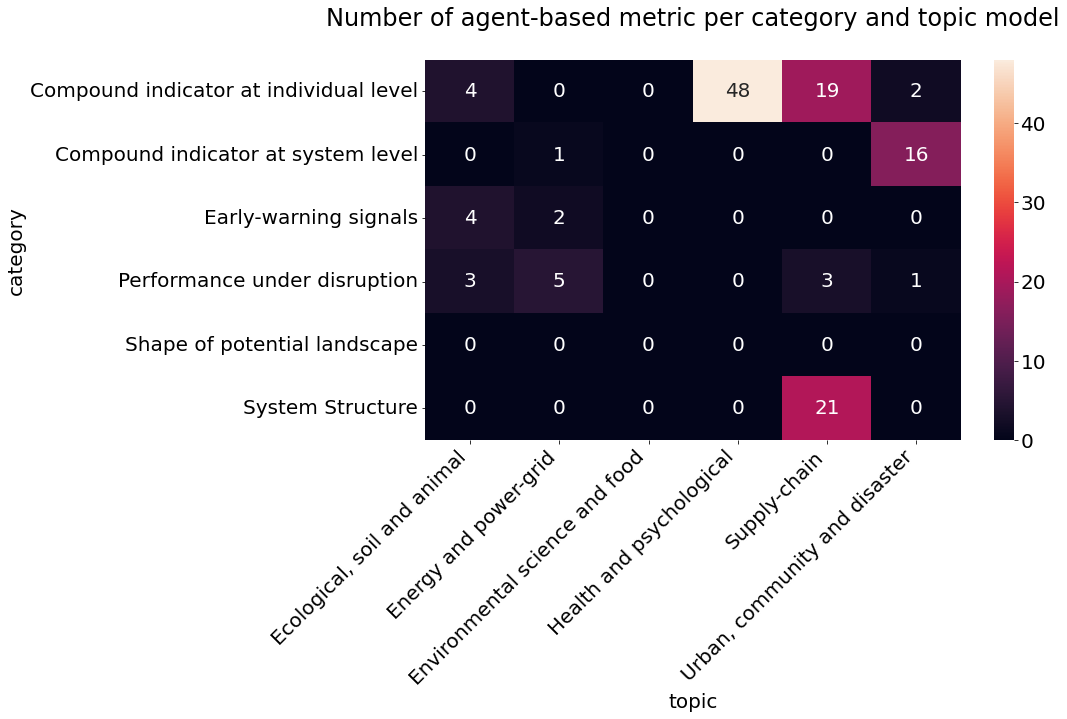

In [12]:
# Agency-based metric per category and topic model

dfGroup = dfNotNull[['topic', 'category', 'agency-based']].groupby(['topic', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "topic", "agency-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of agent-based metric per category and topic model\n')
plt.show()